In [95]:
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score ,mean_absolute_error ,mean_squared_error
from math import sqrt
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
bike = pd.read_csv("bike-sharing-daily.csv")

In [3]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(3), int64(11), object(1)
memory usage: 85.7+ KB


In [5]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [6]:
null_check=bike.isna()

In [7]:
bike.isnull().count()

instant       731
dteday        731
season        731
yr            731
mnth          731
holiday       731
weekday       731
workingday    731
weathersit    731
temp          731
hum           731
windspeed     731
casual        731
registered    731
cnt           731
dtype: int64

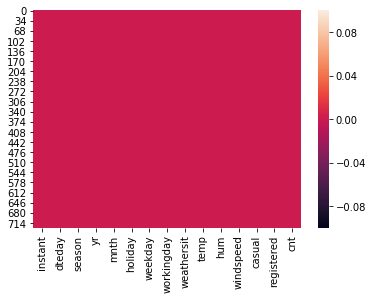

In [8]:
sns.heatmap(null_check) # No NA Value is found

In [9]:
bike.drop(['instant','casual','registered'],axis=1,inplace=True)

In [10]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [11]:
bike.dteday = pd.to_datetime(bike.dteday,format='%m/%d/%Y')

In [12]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [13]:
bike.index=pd.DatetimeIndex(bike.dteday)

In [14]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,,
2011-01-01,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [15]:
bike.drop(['dteday'],axis=1,inplace=True)

In [16]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


Text(0.5, 0, 'monthly')

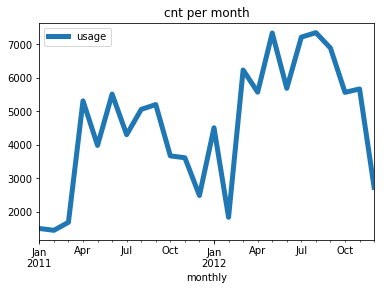

In [17]:
bike['cnt'].asfreq('m').plot(linewidth=5)
plt.legend(['usage'])
plt.title('cnt per month')
plt.xlabel('monthly')

In [18]:
numerical_data = bike[['temp','hum','windspeed','cnt']]

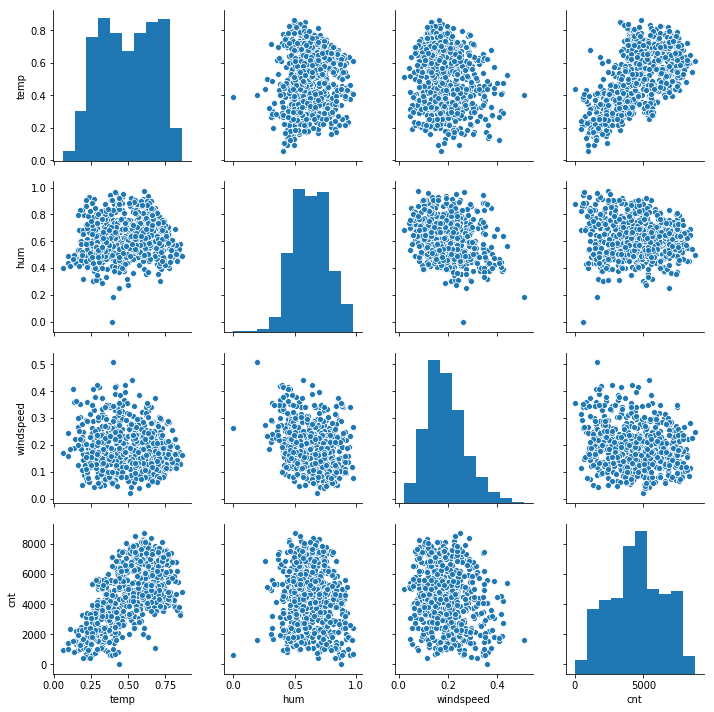

In [19]:
sns.pairplot(numerical_data)

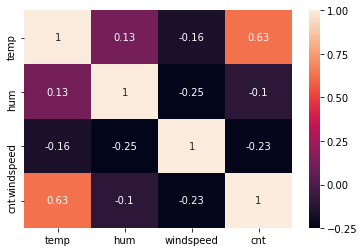

In [20]:
sns.heatmap(numerical_data.corr(),annot=True)

In [21]:
cat_data = bike[['season','yr','mnth','holiday','weekday','workingday','weathersit']]

In [22]:
encoder = OneHotEncoder()

In [23]:
cat_data = encoder.fit_transform(cat_data).toarray()

In [24]:
cat_data

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [25]:
cat_data = pd.DataFrame(cat_data)

In [26]:
cat_data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [27]:
numerical_data = numerical_data.reset_index()

In [28]:
bike_new = pd.concat([cat_data,numerical_data],axis=1)

In [29]:
bike_new.drop('dteday',axis=1,inplace=True)

In [99]:
bike_new.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900,1600


In [31]:
x = bike_new.iloc[:,:-1].values

In [32]:
y = bike_new.iloc[:,-1:].values

In [33]:
y = nor.fit_transform(y)

In [34]:
y

array([[0.11079153],
       [0.08962264],
       [0.15266912],
       [0.17717441],
       [0.18154625],
       [0.18223654],
       [0.1711919 ],
       [0.10780028],
       [0.09203866],
       [0.14944777],
       [0.14277497],
       [0.13115509],
       [0.15922688],
       [0.1609526 ],
       [0.14104924],
       [0.13598711],
       [0.11251726],
       [0.07604694],
       [0.18729867],
       [0.21916705],
       [0.1749885 ],
       [0.11033134],
       [0.11090658],
       [0.16037736],
       [0.22583985],
       [0.05568339],
       [0.04705476],
       [0.13173033],
       [0.12379199],
       [0.1235619 ],
       [0.17015647],
       [0.15393465],
       [0.17303267],
       [0.17579383],
       [0.19397147],
       [0.1130925 ],
       [0.18419236],
       [0.19443166],
       [0.17349287],
       [0.18212149],
       [0.17441325],
       [0.1983433 ],
       [0.16682006],
       [0.18028072],
       [0.21755637],
       [0.20628164],
       [0.24079613],
       [0.282

In [35]:
X_train , X_test , Y_train , Y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [36]:
X_train.shape

(584, 35)

In [37]:
Y_test.shape

(147, 1)

In [77]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=100,activation='relu',input_shape=(35,)))
model.add(keras.layers.Dense(units=150,activation='relu'))
model.add(keras.layers.Dense(units=1,activation='linear'))         

In [78]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               3600      
_________________________________________________________________
dense_11 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 151       
Total params: 18,901
Trainable params: 18,901
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.compile(optimizer='Adam' ,loss='mean_squared_error')

In [80]:
epoch_hist = model.fit(X_train,Y_train,epochs=50,batch_size=20,validation_split=0.2)

Train on 467 samples, validate on 117 samples
Epoch 1/50
467/467 [==============================] - 0s 955us/sample - loss: 0.0738 - val_loss: 0.0151
Epoch 2/50
467/467 [==============================] - 0s 202us/sample - loss: 0.0149 - val_loss: 0.0086
Epoch 3/50
467/467 [==============================] - 0s 232us/sample - loss: 0.0109 - val_loss: 0.0088
Epoch 4/50
467/467 [==============================] - 0s 228us/sample - loss: 0.0086 - val_loss: 0.0079
Epoch 5/50
467/467 [==============================] - 0s 215us/sample - loss: 0.0074 - val_loss: 0.0081
Epoch 6/50
467/467 [==============================] - 0s 202us/sample - loss: 0.0066 - val_loss: 0.0084
Epoch 7/50
467/467 [==============================] - 0s 201us/sample - loss: 0.0063 - val_loss: 0.0096
Epoch 8/50
467/467 [==============================] - 0s 240us/sample - loss: 0.0054 - val_loss: 0.0089
Epoch 9/50
467/467 [==============================] - 0s 180us/sample - loss: 0.0050 - val_loss: 0.0086
Epoch 10/50
467/46

In [81]:
epoch_hist.history.keys()

dict_keys(['loss', 'val_loss'])

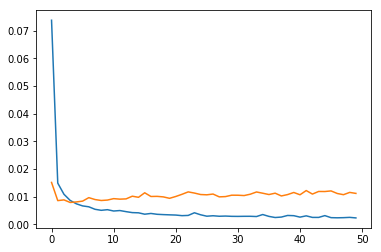

In [82]:
plt.plot(epoch_hist.history['loss'])
plt.plot(epoch_hist.history['val_loss'])

In [105]:
y_predict = model.predict(X_train)

In [97]:
nor.inverse_transform(y_predict

array([[5774.936  ],
       [1238.9214 ],
       [3386.5483 ],
       [3754.6077 ],
       [7091.0767 ],
       [8090.463  ],
       [ 521.3558 ],
       [2758.9102 ],
       [6483.1714 ],
       [6880.4727 ],
       [1006.6461 ],
       [2269.627  ],
       [4467.4805 ],
       [5580.804  ],
       [2157.6096 ],
       [1338.9109 ],
       [1224.9607 ],
       [8288.733  ],
       [4273.032  ],
       [1301.432  ],
       [7764.784  ],
       [6318.845  ],
       [6291.873  ],
       [ 677.83826],
       [1348.2339 ],
       [4454.627  ],
       [1671.1653 ],
       [7428.3257 ],
       [3877.7996 ],
       [5610.5522 ],
       [2865.781  ],
       [3840.9233 ],
       [6693.914  ],
       [7243.0635 ],
       [5889.8594 ],
       [7129.285  ],
       [6624.6963 ],
       [6111.788  ],
       [2878.3389 ],
       [1250.7894 ],
       [3340.925  ],
       [4599.3354 ],
       [7577.518  ],
       [4402.337  ],
       [6875.1685 ],
       [ 830.17914],
       [4630.2456 ],
       [4332.

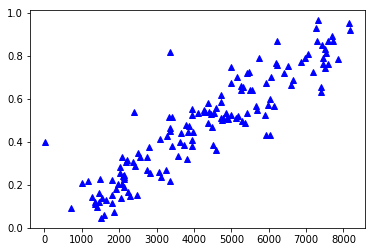

In [88]:
plt.plot(Y_test,y_predict,'^',color='b')

In [89]:
y_predict_org = nor.inverse_transform(y_predict)

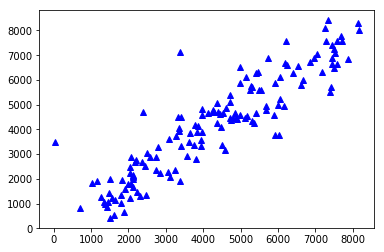

In [91]:
plt.plot(Y_test,y_predict_org,'^',color='b')

In [93]:
k = X_test.shape[1]

In [106]:
n = len(X_test)
n

147

In [119]:
# Error Matrix
def Error_Calculations(Args1,Args2):
    RMSE = float(format(np.sqrt(mean_squared_error(Args1,Args2)),'0.3f'))
    MAE =mean_absolute_error(Args1,Args2)
    r2 = r2_score(Args1,Args1)
    adg_r2 = 1-(1-r2)*(n-1)/(n-k-1)
    return print('RMSE =',RMSE ,'\nMAE = ',MAE,'\nr2 = ' ,r2, '\nAdj(r2) = ' , adg_r2)

In [120]:
Error_Calculations(Y_test,y_predict_org)

RMSE = 856.479 
MAE =  629.6325642073235 
r2 =  1.0 
Adj(r2) =  1.0
